In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# MOUNT GDRIVE TO COLAB
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ryan
train = pd.read_csv('/content/drive/MyDrive/Dataset/binary/train_commenting.csv')
validation = pd.read_csv('/content/drive/MyDrive/Dataset/binary/dev_commenting.csv')
test = pd.read_csv('/content/drive/MyDrive/Dataset/binary/test_commenting.csv')

# Syauqi
#train = pd.read_csv('/content/drive/MyDrive/my dataset/train.csv')
#validation = pd.read_csv('/content/drive/MyDrive/my dataset/dev.csv')
#test = pd.read_csv('/content/drive/MyDrive/my dataset/test.csv')

### Preprocessing

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# HOW MANY RECORDS BEFORE DUPLICATE REMOVAL?
print(len(train), len(validation), len(test), sep='\n')

7201
990
1701


In [6]:
# RENAME COLUMNS
#train = train.rename(columns={'Ogling/Facial Expressions/Staring': 'Ogling', 'Touching /Groping': 'Groping'})
#validation = validation.rename(columns={'Ogling/Facial Expressions/Staring': 'Ogling', 'Touching /Groping': 'Groping'})
#test = test.rename(columns={'Ogling/Facial Expressions/Staring': 'Ogling', 'Touching /Groping': 'Groping'})

In [7]:
# REMOVE DUPLICATES
train.drop_duplicates(subset="Description",keep= False, inplace = True)
validation.drop_duplicates(subset="Description",keep= False, inplace = True)
test.drop_duplicates(subset="Description",keep= False, inplace = True)

In [8]:
# RESET THE ROW INDEX
train.reset_index(drop=True, inplace=True)
validation.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [9]:
# HOW MANY RECORDS AFTER DUPLICATE REMOVAL?
print(len(train), len(validation), len(test), sep='\n')

6493
926
1577


In [10]:
# REMOVE PUNCTUATION AND STOPWORDS
# code source : https://www.kaggle.com/code/aliphya/casestudy-eda-baseline-model/notebook
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_text(data):
    stop = stopwords.words('english')
    res = []
    data['Description'] = data['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    for x in data['Description']:
        x = str(x)
        for punct in puncts:
            if punct in x:
                x = x.replace(punct,' ')
        res.append(x)
    return res

In [11]:
train['Description'] = clean_text(train)
validation['Description'] = clean_text(validation)
test['Description'] = clean_text(test)

In [12]:
# LOWER ALL TEXTS
def lower_text(data):
    res = []
    for i in data['Description']:
        k = i.lower()
        res.append(k)
    return res

In [13]:
train['Description'] = lower_text(train)
validation['Description'] = lower_text(validation)
test['Description'] = lower_text(test)

In [14]:
# CREATE LABELS ARRAY
# def create_label_array(data):
#     res = []
#     for i in zip(data['Commenting'], data['Ogling'], data['Groping']):
#         label = list(i)
#         res.append(label)
#     return res

In [15]:
# train['Labels'] = create_label_array(train)
# validation['Labels'] = create_label_array(validation)
# test['Labels'] = create_label_array(test)

In [16]:
# DROP COLUMNS
# train = train.drop(columns=['Commenting', 'Ogling', 'Groping'])
# validation = validation.drop(columns=['Commenting', 'Ogling', 'Groping'])
# test = test.drop(columns=['Commenting', 'Ogling', 'Groping'])

Text(0.5, 1.0, 'Groping')

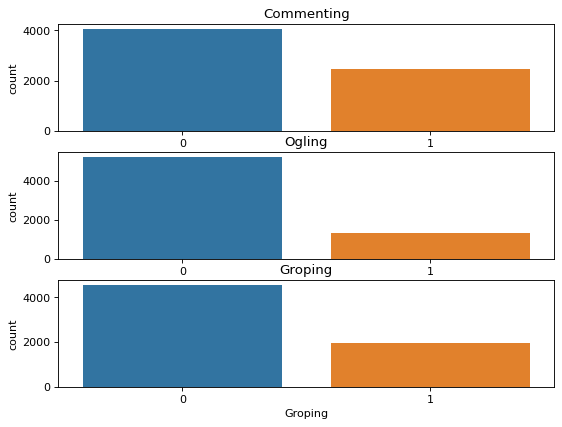

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.subplot(311)
ax1 = sns.countplot(x="Commenting", data=train)
ax1.set_title('Commenting')
plt.subplot(312)
ax2 = sns.countplot(x="Ogling", data=train)
ax2.set_title('Ogling')
plt.subplot(313)
ax3 = sns.countplot(x="Groping", data=train)
ax3.set_title('Groping')

In [18]:
train_text = train['Description']
#train_labels = train[['Commenting', 'Ogling', 'Groping']]
train_labels = train[['Category']]
val_text = validation['Description']
#val_labels = validation[['Commenting', 'Ogling', 'Groping']]
val_labels = validation[['Category']]
test_text = test['Description']
#test_labels = test[['Commenting', 'Ogling', 'Groping']]
test_labels = test[['Category']]

In [20]:
 from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
onehotencoder.fit(train_labels.Category.values.reshape(-1,1))
onehotencoder.fit(val_labels.Category.values.reshape(-1,1))
onehotencoder.fit(test_labels.Category.values.reshape(-1,1))

final_train = onehotencoder.transform([[each] for each in train_labels.Category]).toarray()
final_val = onehotencoder.transform([[each] for each in val_labels.Category]).toarray()
final_test = onehotencoder.transform([[each] for each in test_labels.Category]).toarray()

train_labels.loc[:,"Not Sexual Harassment"] = final_train[:,0]
train_labels.loc[:,"Sexual Harassment"] = final_train[:,1]
val_labels.loc[:,"Not Sexual Harassment"] = final_val[:,0]
val_labels.loc[:,"Sexual Harassment"] = final_val[:,1]
test_labels.loc[:,"Not Sexual Harassment"] = final_test[:,0]
test_labels.loc[:,"Sexual Harassment"] = final_test[:,1]

In [22]:
train_labels = train_labels[["Not Sexual Harassment", "Sexual Harassment"]]
val_labels = val_labels[["Not Sexual Harassment", "Sexual Harassment"]]
test_labels = test_labels[["Not Sexual Harassment", "Sexual Harassment"]]

### Model

In [26]:
EMBEDDING_DIM = 300
MAXLEN = 300
TRUNCATING = 'post'
PADDING = 'post'
OOV_TOKEN = 'OOV_TOKEN'

In [58]:
def fit_tokenizer(train_sentences, num_words, oov_token):

  # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
  tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
    
  # Fit the tokenizer to the training sentences
  tokenizer.fit_on_texts(train_sentences)
    
  return tokenizer

In [59]:
tokenizer = fit_tokenizer(train_text, 8000, OOV_TOKEN)

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

In [30]:
import json

with open( 'word_dict.json' , 'w' ) as file:
	json.dump( word_index , file )

In [31]:
def seq_pad_and_trunc(sentences, tokenizer, padding, truncating, maxlen):

  # Convert sentences to sequences
  sequences = tokenizer.texts_to_sequences(sentences)
    
  # Pad the sequences using the correct padding, truncating and maxlen
  pad_trunc_sequences = pad_sequences(sequences, maxlen=maxlen, padding=padding, truncating=truncating)
    
  return pad_trunc_sequences

In [32]:
train_pad_trunc_seq = seq_pad_and_trunc(train_text, tokenizer, PADDING, TRUNCATING, MAXLEN)
validation_pad_trunc_seq = seq_pad_and_trunc(val_text, tokenizer, PADDING, TRUNCATING, MAXLEN)
test_pad_trunc_seq = seq_pad_and_trunc(test_text, tokenizer, PADDING, TRUNCATING, MAXLEN)

In [33]:
# Define path to file containing the embeddings
GLOVE_FILE = '/content/drive/MyDrive/Dataset/glove.6B.300d.txt'

# Initialize an empty embeddings index dictionary
GLOVE_EMBEDDINGS = {}

# Read file and fill GLOVE_EMBEDDINGS with its contents
with open(GLOVE_FILE) as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    GLOVE_EMBEDDINGS[word] = coefs

In [34]:
# Initialize an empty numpy array with the appropriate size
EMBEDDINGS_MATRIX = np.zeros((VOCAB_SIZE+1, EMBEDDING_DIM))

# Iterate all of the words in the vocabulary and if the vector representation for 
# each word exists within GloVe's representations, save it in the EMBEDDINGS_MATRIX array
for word, i in word_index.items():
    embedding_vector = GLOVE_EMBEDDINGS.get(word)
    if embedding_vector is not None:
        EMBEDDINGS_MATRIX[i] = embedding_vector

In [35]:
EMBEDDINGS_MATRIX.shape

(8585, 300)

In [36]:
def create_model(vocab_size, embedding_dim, maxlen, embeddings_matrix):
    
  model = tf.keras.Sequential([ 
      # This is how you need to set the Embedding layer when using pre-trained embeddings
      tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=maxlen, weights=[embeddings_matrix], trainable=False),
      tf.keras.layers.Dropout(.75),
      tf.keras.layers.Conv1D(128, 3, activation='relu'),
      tf.keras.layers.MaxPooling1D(),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(300, return_sequences=False)),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
  ])
    
  model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

  return model

In [37]:
# Create your untrained model
model = create_model(VOCAB_SIZE, EMBEDDING_DIM, MAXLEN, EMBEDDINGS_MATRIX)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          2575500   
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 conv1d (Conv1D)             (None, 298, 128)          115328    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 149, 128)         0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 600)              1029600   
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                3

In [38]:
# Train the model and save the training history
history = model.fit(train_pad_trunc_seq, train_labels, batch_size=32, epochs=30, validation_data=(validation_pad_trunc_seq, val_labels))

Epoch 1/30
203/203 [==============================] - 20s 28ms/step - loss: 0.6473 - accuracy: 0.6270 - val_loss: 0.6204 - val_accuracy: 0.6944
Epoch 2/30
203/203 [==============================] - 5s 24ms/step - loss: 0.5776 - accuracy: 0.7185 - val_loss: 0.5685 - val_accuracy: 0.7354
Epoch 3/30
203/203 [==============================] - 5s 24ms/step - loss: 0.5494 - accuracy: 0.7354 - val_loss: 0.5398 - val_accuracy: 0.7570
Epoch 4/30
203/203 [==============================] - 6s 27ms/step - loss: 0.5402 - accuracy: 0.7420 - val_loss: 0.5260 - val_accuracy: 0.7559
Epoch 5/30
203/203 [==============================] - 5s 24ms/step - loss: 0.5267 - accuracy: 0.7568 - val_loss: 0.5160 - val_accuracy: 0.7765
Epoch 6/30
203/203 [==============================] - 6s 28ms/step - loss: 0.5250 - accuracy: 0.7564 - val_loss: 0.5039 - val_accuracy: 0.7765
Epoch 7/30
203/203 [==============================] - 5s 24ms/step - loss: 0.5151 - accuracy: 0.7574 - val_loss: 0.4982 - val_accuracy: 0.788

In [39]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

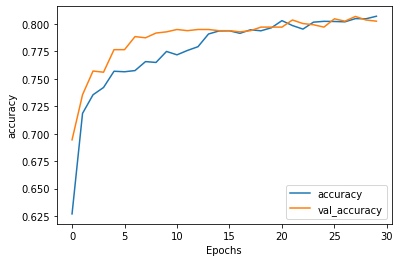

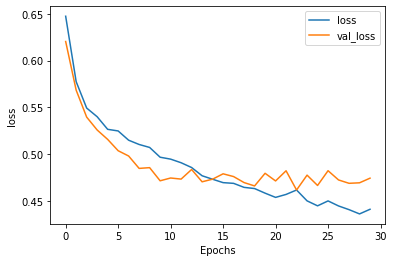

In [40]:
# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### Evaluasi Model

In [48]:
test_pred = model.predict(test_pad_trunc_seq)

In [49]:
test_pred

array([[0.02894749, 0.9710525 ],
       [0.95006573, 0.04993429],
       [0.64227456, 0.3577254 ],
       ...,
       [0.63176507, 0.36823493],
       [0.6982979 , 0.30170214],
       [0.6774251 , 0.32257485]], dtype=float32)

In [ ]:
test_pred = np.where(test_pred >= 0.5, 1, 0)

In [ ]:
test_pred

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0]])

In [ ]:
test_labels = np.array(test_labels)

In [ ]:
test_labels

array([[1, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0]])

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score

print(roc_auc_score(test_labels, test_pred))
print(accuracy_score(test_labels, test_pred))

0.7387824039576735
0.6163601775523145


In [ ]:
hamming_loss(test_labels, test_pred)

0.16529274994715704

In [ ]:
1-hamming_loss(test_labels, test_pred)

0.834707250052843

In [ ]:
model.evaluate(x=test_pad_trunc_seq, y=test_labels)

50/50 [==============================] - 18s 361ms/step - loss: 0.4235 - binary_accuracy: 0.8282


[0.42349302768707275, 0.8281548023223877]

In [ ]:
row_index = 6
prediction = model(np.expand_dims(test_pad_trunc_seq[row_index], 0))
print(prediction)
print(test_labels.loc[row_index])
# print([train_pad_trunc_seq[0]])

tf.Tensor([[0.10201013 0.06483316 0.03322792]], shape=(1, 3), dtype=float32)
Commenting    0
Ogling        0
Groping       0
Name: 6, dtype: int64


### Export the Model

In [41]:
PROTEKU_SAVED_MODEL = "proteku_saved_model"

In [42]:
tf.saved_model.save(model, PROTEKU_SAVED_MODEL)

INFO:tensorflow:Assets written to: proteku_saved_model/assets


INFO:tensorflow:Assets written to: proteku_saved_model/assets


In [43]:
%%bash -s $PROTEKU_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['embedding_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 300)
      name: serving_default_embedding_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 2)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [44]:
loaded = tf.saved_model.load(PROTEKU_SAVED_MODEL)

In [45]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'embedding_input': TensorSpec(shape=(None, 300), dtype=tf.float32, name='embedding_input')})
{'dense_1': TensorSpec(shape=(None, 2), dtype=tf.float32, name='dense_1')}


### Convert Using TFLite's Converter

In [46]:
converter = tf.lite.TFLiteConverter.from_saved_model(PROTEKU_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

In [47]:
tflite_model_file = 'proteku_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

### Test the TFLite Model Using the Python Interpreter

In [50]:
# Load TFLite model and allocate tensors.
with open(tflite_model_file, 'rb') as fid:
    tflite_model = fid.read()

In [66]:
 from lime.lime_text import LimeTextExplainer

In [77]:
# lime interpretation function for deep learning models
def interpret_tflitemodel_lime(model, query="This is default query.", maxlen=300, label="Commenting"):
    """This function interprets deep learning models on given query."""
      
    classes = ['Non-{}'.format(label),label]

    def classifier_pipeline():
        def t_pipeline(texts):
            # step 1: preprocess the query
            input_text = texts
            pad_trunc_sequence = seq_pad_and_trunc(input_text, tokenizer, 'post', 'post', maxlen)
            prob = model.predict(pad_trunc_sequence)
            print(prob)
            prob = prob[:,0]
            result = np.transpose(np.vstack(([1-prob, prob])))
            result = result.reshape(-1,2)
    #         print(result)
            return result
        return t_pipeline
        
    
    classifier_fn = classifier_pipeline()
    
    explainer = LimeTextExplainer(class_names = classes,
                                  kernel_width=25,
                                  bow=True
                                 )
#     print("Query : ",query)
#     print("Type : ",type(query))
#     print("Shape: ",query)
    exp = explainer.explain_instance(query,classifier_fn)
    
    exp.show_in_notebook(text=True, predict_proba=True)

In [80]:
input_text = test.Description.iloc[4]
pad_trunc_sequence = seq_pad_and_trunc(input_text, tokenizer, 'post', 'post', 300)
prob = tflite_model.predict(pad_trunc_sequence)

AttributeError: ignored

In [ ]:
tflite_model

In [78]:
index = 4
test.iloc[index]
interpret_tflitemodel_lime(tflite_model, test.Description.iloc[index])

AttributeError: ignored